In [33]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from pyACC.clustering import count_pairs

import camb
from scipy.spatial import cKDTree

In [34]:
side=500

data=np.random.uniform(0,side,(1000,3))

tree=cKDTree(data)

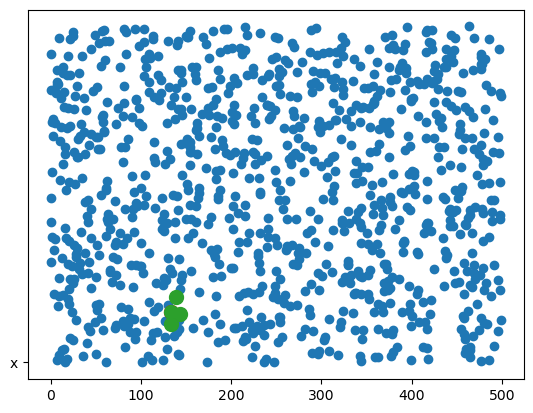

In [35]:
plt.plot(data[:,0],data[:,1],'o')
plt.plot(data[77,0],data[77,1],'ro','x',ms=10)

neighbours=tree.query_ball_point(data[77],50)
plt.plot(data[neighbours,0],data[neighbours,1],'o',ms=10)

In [36]:
r_edges=np.linspace(0,side,31)
pairs_auto=count_pairs(data,r_edges)

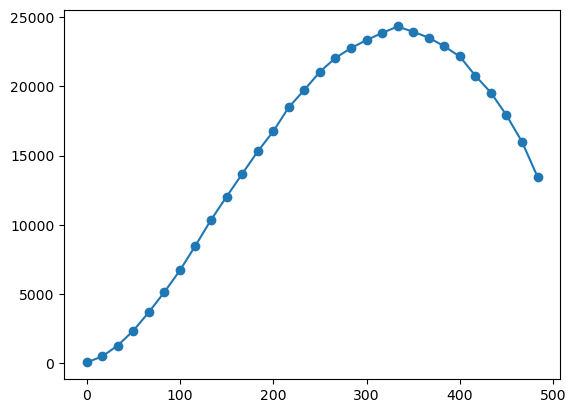

In [37]:
plt.plot(r_edges[:-1],pairs_auto,'o-')

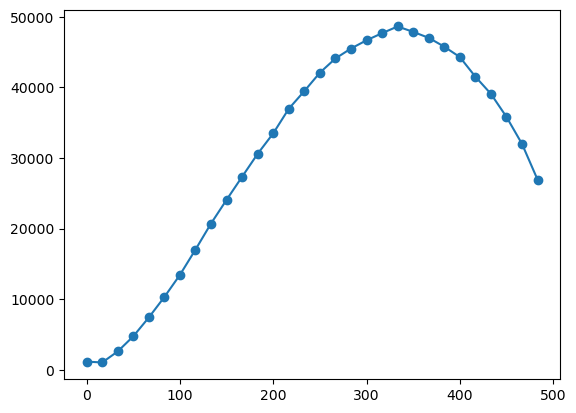

In [38]:
pairs_cross=count_pairs(data,r_edges,data_2=data)
plt.plot(r_edges[:-1],pairs_cross,'o-')

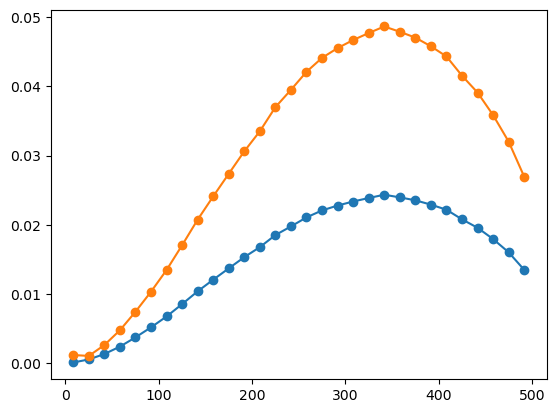

In [39]:
N=len(data)
r_bins=0.5*(r_edges[1:]+r_edges[:-1])
plt.plot(r_bins,pairs_auto/(N*(N-1)),'o-')
plt.plot(r_bins,pairs_cross/(N*(N-1)),'o-')

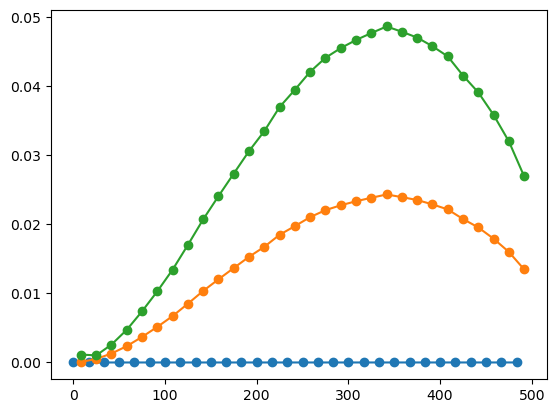

In [40]:
n_bar=N/side**3
pairs_theory=N*n_bar**2*4/3*np.pi*(r_edges[1:]**3-r_edges[:-1]**3)
plt.plot(r_edges[:-1],pairs_theory/N**2,'o-')
plt.plot(r_bins,pairs_auto/(N*(N-1)),'o-')
plt.plot(r_bins,pairs_cross/(N*(N-1)),'o-')